In [2]:
from PIL import Image

### Q. How would you create an image that inverts all the colors?

In [4]:
def invert(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( 255 - r, 255 - g, 255 - b) + alpha)

In [18]:
img = Image.open('cake.png')
invert(img)
img.save('cakeinvert.png')

### Q. How would you create an image that makes the image look like an oldschool green monochrome monitor?

In [23]:
def oldskool(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            if y%2 == 1:
                pngimage.putpixel((x, y), ( r - 100, g, b - 100) + alpha)
            else:
                pngimage.putpixel((x, y), ( 0,0,0))
            

In [24]:
img = Image.open('cake.png')
oldskool(img)
img.save('cakeoldskool.png')

### Q. How would you create an image that looks sick (is tinted brownish)?

In [32]:
def sickly(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( r - 80, g - 80, b - 150) + alpha)

In [33]:
img = Image.open('cake.png')
sickly(img)
img.save('cakesick.png')

### How to write the blur function

In [34]:
img = Image.new('RGB',(100,100),'white')

In [35]:
img.getpixel((40,50))#get RGB value

(255, 255, 255)

In [36]:
img.getpixel((40,50))[0]#get the red value

255

In [37]:
for i in range(0,3):   #get a pixels R, G, B values using iteration
    print img.getpixel((40,50))[i]

255
255
255


In [38]:
#generalize getpixel to grab the red of any x,y value
x = 10
y = 20
img.getpixel((x , y)) [0]

255

In [39]:
#now sum up all the pixel values around a particular location
around = img.getpixel((x - 1 , y - 1)) [0] + \
         img.getpixel((x     , y - 1)) [0] + \
         img.getpixel((x + 1 , y - 1)) [0] + \
         img.getpixel((x - 1 , y   )) [0] + \
            img.getpixel((x + 1 , y   )) [0] + \
            img.getpixel((x - 1 , y + 1)) [0] + \
            img.getpixel((x     , y + 1)) [0] + \
            img.getpixel((x + 1 , y + 1)) [0] 

In [40]:
#note that the backslash allows us to break a long expression to a new line

In [47]:
img.show()

In [42]:
img.putpixel((50,50),(0,0,0))

In [43]:
img.show()

In [44]:
x = 50
y = 50
print around / 8.0

255.0


In [48]:
#make a black square only around our pixel
img.putpixel((49,49),(0,0,0))
img.putpixel((49,50),(0,0,0))
img.putpixel((49,51),(0,0,0))
img.putpixel((50,51),(0,0,0))
img.putpixel((50,49),(0,0,0))
img.putpixel((51,49),(0,0,0))
img.putpixel((51,50),(0,0,0))
img.putpixel((51,51),(0,0,0))
img.show()

In [49]:
#go up and run the around cell again
around

2040

In [50]:
x = 50
y = 50


In [51]:
#so we've verified the neighbor checking works in around

In [52]:
#now go through all the colors
around = 0
for c in [0,1,2]:
    around = around + \
    img.getpixel((x - 1 , y - 1)) [c] + \
    img.getpixel((x     , y - 1)) [c] + \
    img.getpixel((x + 1 , y - 1)) [c] + \
    img.getpixel((x - 1 , y )) [c] + \
    img.getpixel((x + 1 , y )) [c] + \
    img.getpixel((x - 1 , y + 1)) [c] + \
    img.getpixel((x     , y + 1)) [c] + \
    img.getpixel((x + 1 , y + 1)) [c] 
around = around / 24.0

In [53]:
print around

0.0


In [54]:
img = Image.new('RGB', (100,100), 'white')
#run the above two lines again and verify what we expect

In [55]:
#now bundle it all up into a function for checking all the values
#nearby a location of an image
def nearby(img,(x,y)):
    around = 0
    for c in [0,1,2]:
        around = around + \
        img.getpixel((x - 1 , y - 1)) [c] + \
        img.getpixel((x     , y - 1)) [c] + \
        img.getpixel((x + 1 , y - 1)) [c] + \
        img.getpixel((x - 1 , y )) [c] + \
        img.getpixel((x + 1 , y )) [c] + \
        img.getpixel((x - 1 , y + 1)) [c] + \
        img.getpixel((x     , y + 1)) [c] + \
        img.getpixel((x + 1 , y + 1)) [c] 
    around = around / 24.0
    return around

In [58]:
#note nearby takes two arguments, the first is the image
#and the xecond is the tuple coordinate
ourimage  = Image.open('apples.png')

In [59]:
ourimage.size

(100, 100)

In [60]:
nearby(ourimage,(72,72))

59.958333333333336

In [61]:
#no errors, seems believable

In [62]:
#rename to differ
#return the difference between current pixel value and neighbors

In [63]:
def differ(img,(x,y)):
    current = 0
    around = 0
    for c in [0,1,2]:
        current = current + img.getpixel((x,y))[c]  #grab the color value
        around = around + \
        img.getpixel((x - 1 , y - 1)) [c] + \
        img.getpixel((x     , y - 1)) [c] + \
        img.getpixel((x + 1 , y - 1)) [c] + \
        img.getpixel((x - 1 , y )) [c] + \
        img.getpixel((x + 1 , y )) [c] + \
        img.getpixel((x - 1 , y + 1)) [c] + \
        img.getpixel((x     , y + 1)) [c] + \
        img.getpixel((x + 1 , y + 1)) [c] 
    around = around / 24.0
    return around - (current/3.0)

In [64]:
differ(ourimage,(72,72))

1.2916666666666714

In [65]:
ourimage.show()


In [66]:
#now we can continue with blurring
#we can change the pixel value by half the difference

In [67]:
#also note that because we're changing the image a lot, we need
#to make a copy
def blur(img):
    blurred = Image.new('RGB', img.size) #create a copy
    for x in range( 1,img.size[0]-1):
        for y in range( 1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  differ(img, (x,y)) / 2
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

In [68]:
blur(ourimage)

TypeError: integer argument expected, got float

In [69]:
#remove that index error!
def blur(img):
    blurred = Image.new('RGB', img.size) #create a copy
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  int(differ(img, (x,y)) / 2.0)
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

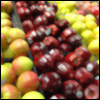

In [70]:
blur(ourimage)

In [71]:
#how to change a floating point value to an integer
#use an int() conversion method
int(500.2) 

500

In [72]:
#works for variables too
ratio = 120.7
int(ratio)

120

In [73]:
#but we don't want to truncate the decimal, 
#we want it to round to nearest integer
round(ratio)

121.0

In [74]:
#integer argument expected... the solution is pixel color values need to be integers
def blur(img):
    blurred = Image.new('RGB', img.size) 
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  differ(img, (x,y)) / 2.0
            change = int(round(change))
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

In [75]:
twoline = Image.new('RGB',(100,100),'white')

In [76]:
for x in range(0, twoline.size[0]):
    for y in range(0, twoline.size[1]):
        twoline.putpixel((x,50),(0,0,0))
        twoline.putpixel((50,y),(255,0,0))
        
twoline.save('twoline.png')
twoline.show()

In [77]:
twoline = blur(twoline)

In [78]:
twoline.show()
twoline.save('twoline_blurred.png')

In [81]:
apple = Image.open('apples.png')
apple.show()

In [82]:
apple = blur(apple)

In [83]:
apple.show()
apple.save('apple_blurred.png')

In [84]:
#preserve transparency
def blur(img):
    blurred = Image.new('RGBA', img.size) 
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            alpha = img.getpixel((x,y))[3:]
            change =  differ(img, (x,y)) / 2.0
            change = int(round(change))
            newpixel = (r + change, g + change, b + change) + alpha
            blurred.putpixel((x,y),  newpixel )
    return blurred

In [86]:
apple = Image.open('apples.png')
apple.show()

In [87]:
apple = blur(apple)
apple.show()
apple.save('apple_blurred_trans.png')

In [88]:
for i in range(0,20):
    apple = blur(apple)
    apple.save('apple_20blur.png')

In [89]:
apple.show()

In [90]:
black = 0
white = 255

In [91]:
#what arithmetic is needed to change black to white?
255-black

255

In [92]:
#white into black
255-white

0

In [93]:
#inverting an image
#white will become black, black becomes white
def invert(pngimage):  #copied from modify function
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))
            pngimage.putpixel((x, y), ( 255 - r, 255 - g, 255 - b))

In [94]:
invert(apple) #uh oh, error about alpha

ValueError: too many values to unpack

In [95]:
def invert(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( 255 - r, 255 - g, 255 - b) + alpha)

In [96]:
apple.show()
invert(apple)

In [97]:
apple.save('apple_inverted.png')

In [ ]:
#old skool
def old_skool(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( r , g + 122, b ) + alpha)

In [ ]:
apple = Image.open('apple.png')

In [ ]:
old_skool(apple)

In [ ]:
apple.show()
apple.save('apple_oldskool.png')

### Q.  can you make a cool filter that takes out all the blue?


In [101]:
def notblue(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( r , g , b - b ) + alpha)

In [102]:
apple = Image.open('apples.png')
notblue(apple)
apple.save('apples_notblue.png')